# Exploratory Data Analysis of the Complete Journey Data
## Ki Jung Lee<br>

## 1. Introduction

The scenario for this sample project is identifying a potential area of growth where the company could invest future resources to increase revenue and profits. In this case study, the `completejourney` data, from the Python `completejourney_py` package, is used to find solutions for the proposed business problems. The data represents grocery store shopping transactions over one year from a group of 2,469 households who are frequent shoppers at a retailer. The case study aims to present a solution to suggest effective campaign types for difrrent product types and target demographics. The solution is presented in 2 related business questions as presented below:<br>
**Business question 1: How does customer spending vary by product types and customer demographics?**<br>
**Business question 2: What is the impact of campaigns on sales for different product types and customer demographics?**

### 1.1 Business questions

Consumer spending behavior is deeply intertwined with various demographic factors. Age, for instance, influences preferences, with younger consumers favoring experiences and technology while older individuals prioritize health-related products. Income levels also play a crucial role, as higher earners have more disposable income for luxury goods and premium brands. Geography, cultural background, gender, education, and family composition further contribute to the diversity in spending habits. Recognizing these nuances enables retailers to tailor their marketing strategies and product offerings effectively. By understanding the unique needs and preferences of different demographic groups, businesses can create personalized experiences that resonate with consumers, ultimately driving sales and fostering long-term loyalty. <br>
**Business question 1: How does customer spending vary by product types and customer demographics?**

Retailers can significantly enhance their sales by implementing targeted promotional strategies that cater to the specific nature of different product types. Research has consistently shown that the effectiveness of sales promotions is not uniform across all product categories. Price-based promotions, such as discounts and coupons, tend to be more effective in driving sales for utilitarian products, as consumers often prioritize price when purchasing these essential items. In contrast, such promotions have minimal impact on the sales of hedonic products, where factors like brand loyalty and perceived value outweigh price considerations. Furthermore, the success of promotions like buy-one-get-one (BOGO) offers can also vary significantly depending on the product type, with certain categories showing more responsiveness than others. Understanding these nuances allows retailers to strategically allocate their marketing budgets, focusing price promotions on utilitarian products and employing alternative strategies, such as free gifts or loyalty programs, for hedonic products. By aligning promotional strategies with consumer motivations and preferences, retailers can effectively boost sales and optimize marketing ROI. <br>
**Business question 2: What is the impact of campaigns on sales for different product types and customer demographics?**

### 1.2 Data & analytical approaches

The `completejourney` study is a comprehensive study of grocery store shopping behavior that provides insights into how consumers shop for groceries and how retailers can optimize their marketing and inventory strategies. The study includes data on customer demographics, product purchases, promotions, and more, and is designed to help retailers better understand their customers and improve their bottom line. With the `completejourney_py` package, Python users can analyze customer spending patterns, identify popular products, and optimize pricing and promotional strategies to increase revenue and profifits.<br>
- To answer the business question 1, we need four columns, i.e., 'age', 'income', 'product_type', and 'sales_value'. To use the columns in a single dataframe, transactions, demographics, and products dataframes are merged. Then, the merged data is grouped the by demographic variables, i.e., 'age' and 'income', and product types, i.e., 'product_type'. Finally, the percentage of spending for each product type within each demographic group is calculated.<br>
- In answering the business question 2, 'campaign_type' colum from the campaign_descriptions dataframe is required. Therefore, two additional dataframes are added, i.e., 'campaigns' and 'campaign_descriptions' and merged. Based on the merged dataframe, business question 2 is answered in a two-step process. The first step involves comparing campaign types in terms of their success in driving sales based on product types. Initially, the merged dataframe is grouped by campaign_type, product type, and the total sales is computed. Then, the campaigns by sales are sorted in descending order. In the second step, campaign types are compared in terms of their success in driving sales based on demographics, i.e., age and income.<br>

Notice that the five dataframes are merged to begin with to reduce the coding space.

### 1.3 Proposed solution

The exploratory analyses show 1) a heatmap of the top 10 product types in sales for each age group, 2) bar graphs of the top 10 in sales by product types for each campaign type, and 3) bar graphs of total sales by age and income for each campaign type. The analyses will help the managers to make decisions on the optimal types of campaign for different product types and optimize their marketing mix for diverse customer segments. *Specific recommendations are described in the summary section below.*

## 2. Packages & Libraries

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot
from completejourney_py import get_data
import warnings
warnings.filterwarnings("ignore")

- `import pandas as pd`: This line imports the Pandas library and assigns it the alias `pd`. Pandas is a library for data manipulation and analysis. It provides data structures for efficiently storing and manipulating large datasets, as well as tools for cleaning, transforming, and analyzing data.
- `import matplotlib.pyplot as plt`: This line imports the `pyplot` module from the Matplotlib library and assigns it the alias `plt`. Matplotlib is a library for creating static, interactive, and animated visualizations in Python. The `pyplot` module provides a simple interface for creating plots and charts.
- `import seaborn as sns`: This line imports the Seaborn library and assigns it the alias `sns`. Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.
- `from bokeh.plotting import figure, show, output_notebook`: This line imports the `figure`, `show`, and `output_notebook` functions from the Bokeh library. Bokeh is a Python library for creating interactive visualizations for modern web browsers. The `figure` function creates a new figure for plotting, `show` displays the figure in the browser, and `output_notebook` sets up the notebook to display Bokeh plots inline.
- `from bokeh.transform import factor_cmap`: This line imports the `factor_cmap` function from the Bokeh library. `factor_cmap` is a utility function for mapping categorical variables to colors in Bokeh plots.
- `gridplot` is a function in the `bokeh.layouts` module that allows you to arrange multiple Bokeh plots in a grid layout. This function takes a list of lists of plots as input and returns a grid of plots.
- `from completejourney_py import get_data`: This line imports the `get_data` function from the `completejourney_py` module.
- `import warnings`: This line imports the `warnings` module, which provides a way to handle warnings that occur during program execution. This line of code is used to suppress warnings that are generated by Python. The `filterwarnings` function is used to specify how warnings should be handled. In this case, the `"ignore"` argument is passed to the function, which tells Python to ignore all warnings that are generated by the program.

## 3. Exploratory Data Analyses

Exploratory data analysis entails a process of conducting investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions through descriptive analyses and data visualizations. Visualizations such as histograms, box plots, scatter plots, and heat maps can be used to illuminate trends, relationships, and clusters within the data. An important goal is generating these graphics to make significant characteristics in the data more observable and to inform constructive questions about relationships between variables. In this case study, we are primarily concerned with providing insights into the relationships among the product types, demographics, campaigns, and sales.

### 3.1 Data load and merge

Once all packages and libraries are imported, the `completejourney` data is loaded and transactions, demographics, products, campaigns, and campaign_descriptions are selected and merged.

In [16]:
# Load the data
data = get_data()
transactions = data["transactions"]
demographics = data["demographics"]
products = data["products"]
campaigns = data["campaigns"]
campaign_descriptions = data["campaign_descriptions"]

# Include transactions, demographics, products, campaigns, and campaign_descriptions
merged_data = pd.merge(transactions, demographics, on="household_id")
merged_data = pd.merge(merged_data, products, on="product_id")
merged_data = pd.merge(merged_data, campaigns, on="household_id")
merged_data = pd.merge(merged_data, campaign_descriptions, on="campaign_id")

### 3.2 Customer spending by product types and customer demographics

The exploratory analysis in this section concerns the business question 1, "How does customer spending vary by product types and customer demographics?" Some insights can be summarized as below:<br>
- Top spending for the age group of 19-24 is alcoholic beverages while in all other age groups, gasoline is the top spending product type.
- Gasoline is the pruduct type that has overall most spending across different age groups and income levels.
- The age group of 25-34 in the income level of 175k-199k has top spending in diffrent types of wines.

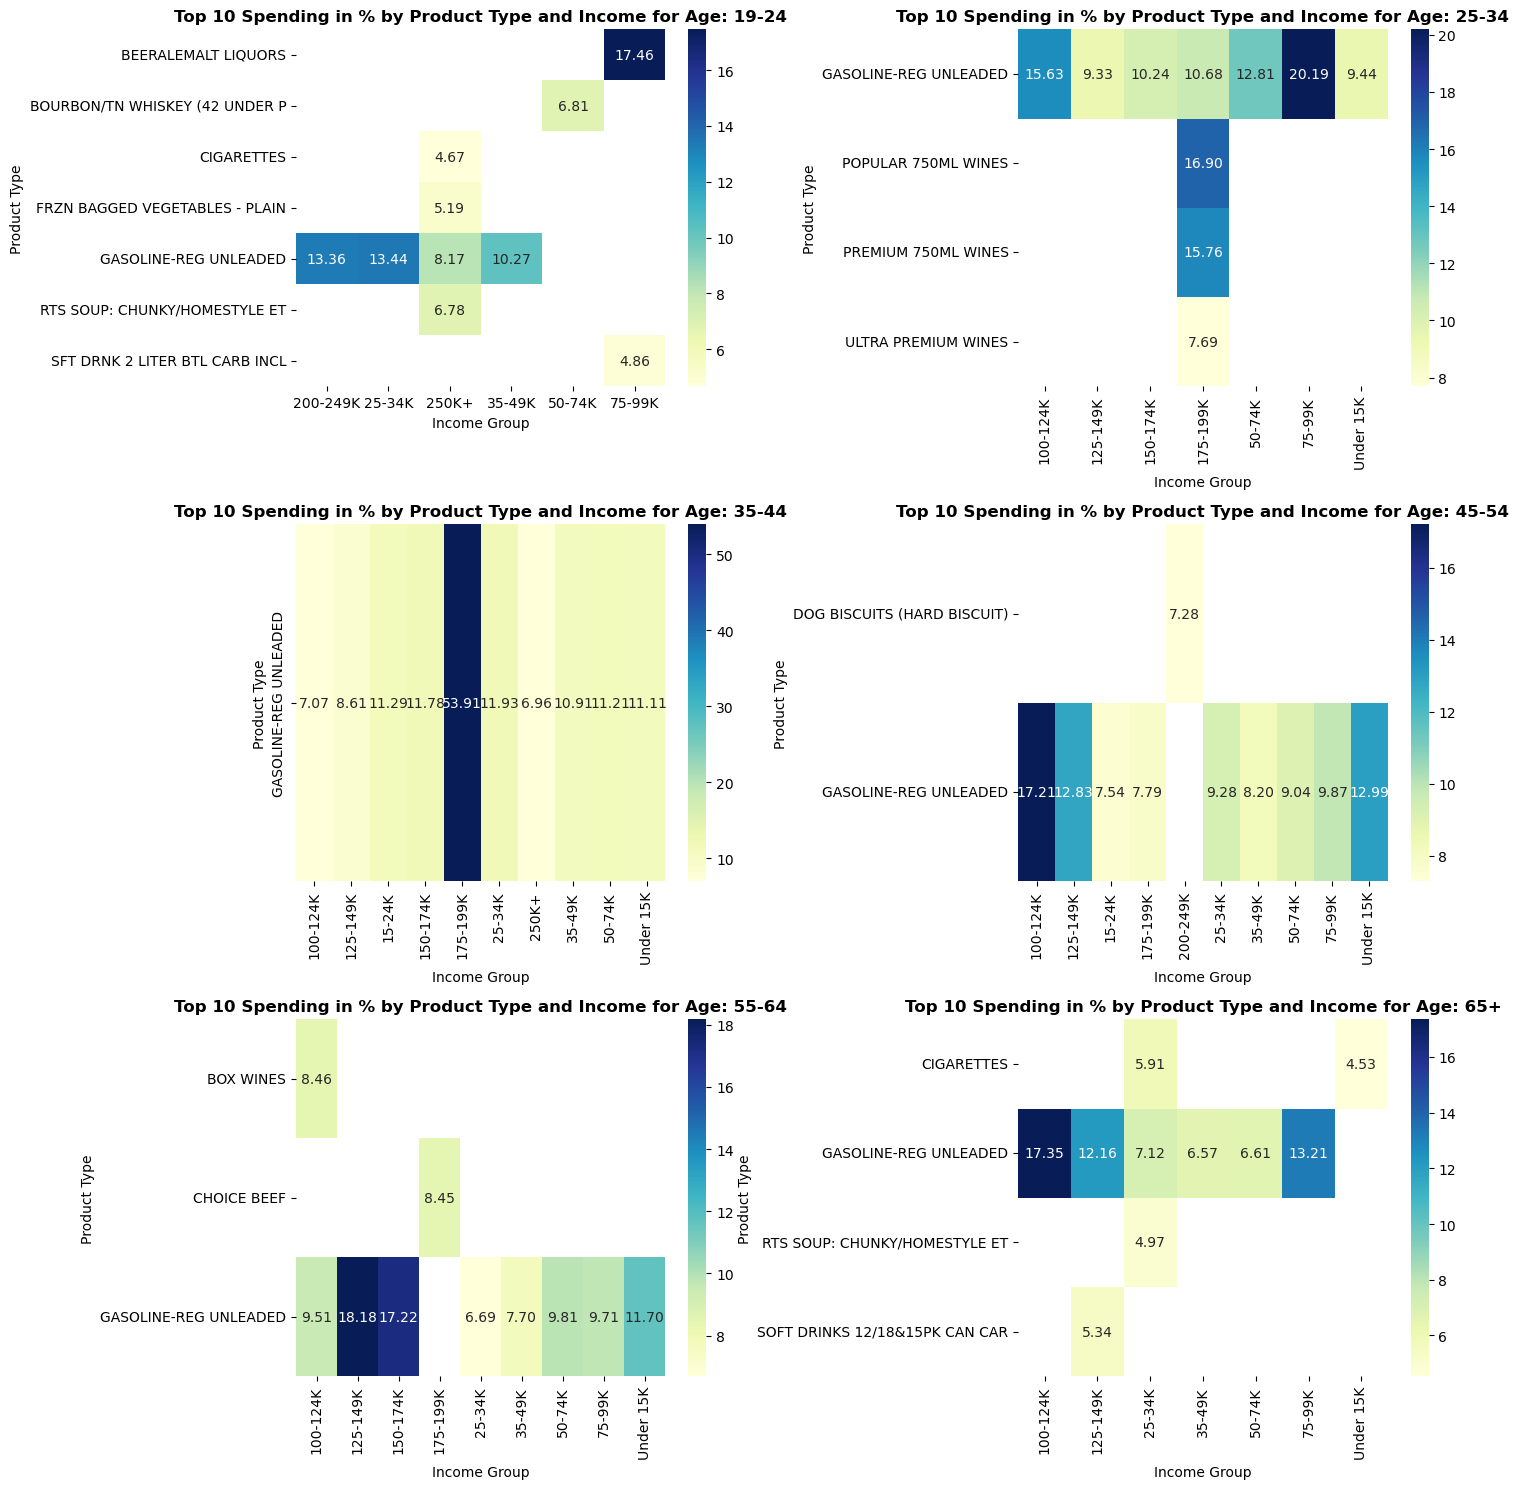

In [18]:
# Group the data by demographic variables and product type
grouped_data = merged_data.groupby(["age", "income", "product_type"])

# Calculate the percentage of spending for each product category within each demographic group
spending_by_group = grouped_data["sales_value"].sum()
total_spending_by_demographic = spending_by_group.groupby(["age", "income"]).sum()
spending_by_product_type = spending_by_group / total_spending_by_demographic * 100

# Get the top 10 product types for each age group
spending_by_product_type = spending_by_product_type.reset_index()
top_types = {}
for age in spending_by_product_type["age"].unique():
    top_types[age] = spending_by_product_type[spending_by_product_type["age"] == age].sort_values(by="sales_value", ascending=False)[:10]

# Create a heatmap for each age group
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
for i, (age, table) in enumerate(top_types.items()):
    row = i // 2
    col = i % 2
    sns.heatmap(table.pivot(index="product_type", columns=["income"], values="sales_value"), cmap="YlGnBu", annot=True, fmt=".2f", ax=axs[row, col])
    axs[row, col].set_title(f"Top 10 Spending in % by Product Type and Income for Age: {age}", loc="center", weight="bold")
    axs[row, col].set_xlabel("Income Group")
    axs[row, col].set_ylabel("Product Type")
plt.tight_layout()
plt.show()

### 3.2 Total sales by campaign types and customer demographics

The exploratory analysis in this section concerns the business question 2, "What is the impact of campaigns on sales for different product types and customer demographics?" The analysis below especially describes campaign types in terms of their success in driving sales based on product types. Some insights can be summarized as below:<br>
- Across all campaign types, gasoline is the most successful item in driving successful sales.
- Some other top items include white milk, soft drinks, alcoholic beverages, beef, cheese, cigarettes, and toilet tissues.
- There are not much variations in the list of top 10 items in driving successful sales for all campaign types.

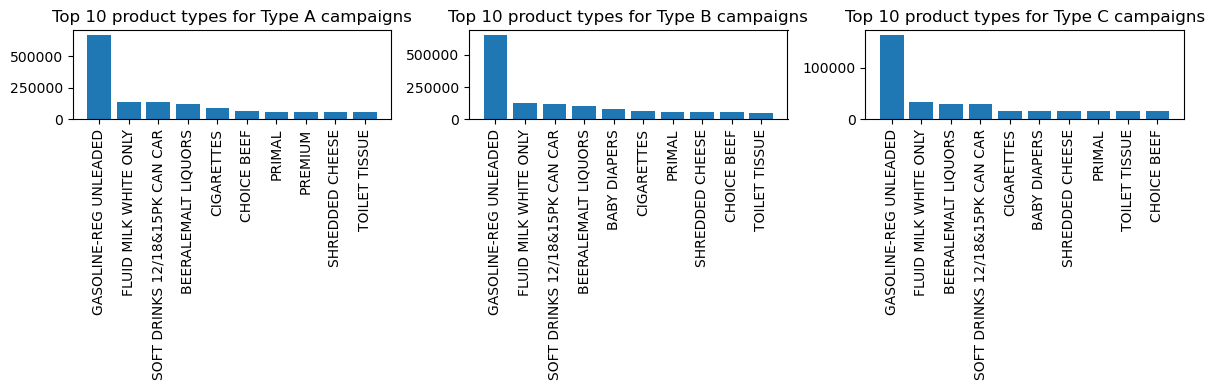

In [20]:
# Grouping by campaign, product type, and calculating the total sales
campaign_sales = merged_data.groupby(["campaign_type", "product_type"])["sales_value"].sum()
campaign_sales = campaign_sales.sort_values(ascending=False)

# Plotting the top 10 product types for each campaign type
plt.figure(figsize=(16, 4))
for i, campaign_type in enumerate(campaign_sales.index.get_level_values("campaign_type").unique()):
    plt.subplot(1, 4, i+1)
    plt.bar(campaign_sales[campaign_type].nlargest(10).index, campaign_sales[campaign_type].nlargest(10).values)
    plt.title(f"Top 10 product types for {campaign_type} campaigns")
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show();

The analysis below describes campaign types in terms of their success in driving sales based on demographics. Some insights can be summarized as below:<br>
- Type B campaign is most successful in drving sales in all age groups.
- Type B campaign is most successful in driving sales at all income levels.

In [22]:
# Group the data by demographic variables and campaign type
grouped_data2 = merged_data.groupby(["age", "income", "campaign_type"])
sales_by_group = grouped_data2["sales_value"].sum()

# Create and populate dictionary to make a dataframe
data_dict = {"age": [], "sales_value": [], "campaign_type": []}
for (age, income, campaign_type), sales_value in sales_by_group.items():
    data_dict["age"].append(age)
    data_dict["sales_value"].append(sales_value)
    data_dict["campaign_type"].append(campaign_type)
df = pd.DataFrame(data_dict)

# Group the DataFrame by age and campaign_type and sum the sales_value
grouped_df = df.groupby(["age", "campaign_type"]).sum()
grouped_df = grouped_df.reset_index()

# Plotting the campaign types for each age
ages = list(grouped_df["age"].unique())
colors = factor_cmap("campaign_type", palette=["#c9d9d3", "#718dbf", "#e84d60"], factors=list(grouped_df["campaign_type"].unique()))
p1 = figure(x_range=ages, height=350, title="Sales Value by Age and Campaign Type",
           toolbar_location=None, tools="")
p1.vbar(x="age", top="sales_value", width=0.9, source=grouped_df, line_color="white", fill_color=colors, legend_field="campaign_type")
p1.xaxis.axis_label = "Age"
p1.yaxis.axis_label = "Sales Value"
p1.legend.location = "top_left"
p1.yaxis.formatter.use_scientific = False
p1.yaxis.formatter.precision = 2

# Create and populate dictionary to make a dataframe
data_dict = {"income": [], "sales_value": [], "campaign_type": []}
for (age, income, campaign_type), sales_value in sales_by_group.items():
    data_dict["income"].append(income)
    data_dict["sales_value"].append(sales_value)
    data_dict["campaign_type"].append(campaign_type)
df = pd.DataFrame(data_dict)

# Group the DataFrame by income and campaign_type and sum the sales_value
grouped_df = df.groupby(["income", "campaign_type"]).sum()
grouped_df = grouped_df.reset_index()

# Plotting the campaign types for each income
incomes = list(grouped_df["income"].unique())
colors = factor_cmap("campaign_type", palette=["#c9d9d3", "#718dbf", "#e84d60"], factors=list(grouped_df["campaign_type"].unique()))
p2 = figure(x_range=incomes, height=350, title="Sales Value by Income and Campaign Type",
           toolbar_location=None, tools="")
p2.vbar(x="income", top="sales_value", width=0.9, source=grouped_df, line_color="white", fill_color=colors, legend_field="campaign_type")
p2.xaxis.axis_label = "Income"
p2.yaxis.axis_label = "Sales Value"
p2.legend.location = "top_left"
p2.yaxis.formatter.use_scientific = False
p2.yaxis.formatter.precision = 2

# Combine the two plots
combined_plot = gridplot([[p1, p2]])
output_notebook()
show(combined_plot)

Loading BokehJS ...

## 4. Summary

### 4.1 Problem statement

Grocery retailers need more effective ways to tailor their promotional campaigns and product offerings to customers across different demographics and product categories in order to optimize marketing spend and positively influence customer spending behaviors. Specifically:
1. Retailers need to understand how customer spending varies based on age, income level, and other demographic factors across different product types so that they can match their promotions and assortments to the preferences of diverse customer segments.
2. Retailers also need to analyze the impact of past campaigns on sales for different product types and demographics to determine the optimal campaign strategies for driving sales across customer segments and product categories. Findings can enable data-driven decisions to personalize promotions based on predicted purchasing motivations and price sensitivity.

The end goal is to allow companies to optimize their marketing mix and tailor campaigns more effectively to increase basket size, conversion rates, and revenue growth across their diverse customer base.

### 4.2 Data & analytical approach

The completejourney study provides detailed data on grocery shopping patterns to help retailers optimize strategies. The completejourney_py Python package enables analyses on customer spending, product popularity, pricing, promotions, etc to boost revenue and profits.

To address business question 1 on spending by product type and demographics:

- Transactions, demographics, products data are merged
- Grouped by age, income, product type
- Calculated % spending on each product type for each age-income group

To address business question 2 on campaign impact by product and demographics:

- Added campaigns, campaign descriptions data
- Merged into single dataframe
- Two step analysis:
    - Step 1: Compare campaigns by product type - grouped data by campaign type and product type to total sales, sort campaigns by sales
    - Step 2: Compare campaigns by demographics - grouped data by age/income and campaign type to sum sales

### 4.3 Insights

The document presents an exploratory data analysis using the completejourney dataset to address two business questions for a grocery retailer:

1. How customer spending varies by product type and demographics
Insights:
- Top spending for 19-24 age group is alcohol; for other ages, top spending is gasoline
- Gasoline has highest spending across age groups and income levels
- 25-34 age group with 175K-199K income has top spending on different wine types
2. Impact of campaigns on sales by product type and demographics
Insights:
- Gasoline most successful at driving sales across all campaign types
- Top products in campaigns are milk, soft drinks, alcohol, beef, cheese, cigarettes, tissues
- Little variation in top products across campaigns
- Type B campaigns most successful at driving sales across age and income groups

### 4.4 Implication & proposed solutions

The exploratory analysis show 1) a heatmap of the top 10 product types in sales for each age group, 2) bar graphs of the top 10 in sales by product types for each campaign type, and 3) bar graphs of total sales by age and income for each campaign type. The analyses will help the managers to make decisions on the optimal types of campaign for different product types and optimize their marketing mix for diverse customer segments.<br>
Here are some suggested marketing recommendations based on the key insights:

1. Spending by Demographics
- Target wine and alcohol promotions like tasting events and loyalty programs towards younger 21-35 age high income shoppers
- Launch a fuel rewards program with personalized offers and discounts for all shoppers to drive gas station traffic and in-store purchases
- Develop radio and digital ads for fuel savings aimed at older demographic segments
2. Campaign Impact
- Allocate more marketing budget towards high performing type B campaigns
- Send type B campaigns promoting popular products like milk, soft drinks, alcohol to drive incremental sales
- Limit lower performing campaigns to avoid marketing dollars waste, allocate towards type B
- Create more segmented type B campaigns aimed at age and income brackets with gasoline, alcohol, and tobacco
- Test effect of type B cross-sell campaigns with discounted complementary products like chips+soda

### 4.5 Limitations & future suggestions

There are some key limitations of only conducting exploratory analysis:

1. Exploratory analysis is mostly descriptive in nature and does not allow making causal claims. For example, while we see campaign type B is most successful across segments, we cannot claim campaign B causes higher sales without further statistical testing.
2. Potential issues like sampling bias, correlations vs causations are not addressed through exploratory analysis alone. For example, segments attracted to campaign B may naturally have higher purchase tendencies.
3. Without modeling techniques, it is hard to predict outcomes for new data. Descriptive statistics may not hold out of sample.
4. Lack predictive power to optimize business decisions like marketing mix allocation, inventory planning based on demand forecasts etc.

Some future directions utilizing more advanced analytics:

1. Build general linear models relating spending/sales to demographic factors, product attributes, promotional variables, macroeconomic factors etc. This can establish causal relationships, quantify effect sizes and make predictive models to simulate various what-if scenarios. 
2. Use techniques like regression, multivariate analysis, machine learning algorithms to develop customer segmentation models, response models, lifetime value models, and recommendation systems tailored to grocery industry needs.

In summary, exploratory analysis forms a starting point but building statistical and machine learning models are necessary to move towards prescriptive analytics that can guide executive decision making on resource allocation and strategy. Combining business context with advanced analytics leads to highest business impact.